# Probability Distributions



In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform, binom, norm

#  Generating Data from a Specific Distribution


A random variable $X$ is a function that represents a random phenomenon, meaning its exact value cannot be determined. However, probabilities can be assigned to a set of possible values it can take. For example, if $X$ has a uniform distribution on $[2, 4]$, we cannot determine the exact value of $X$, but we can say with a probability of $1$ that the value lies between $[2, 4]$. We can also say that:

$$P(X \leq 3) = \frac{1}{2}$$

where $3$ is the midpoint of the interval $[2, 4]$. Therefore, you have learned that a random variable is associated with a function called the probability density function (pdf), which encodes the probability of the random variable falling within a given range. In other words, if $X$ is a continuous random variable and $f$ is its pdf, then:

$$P(a \leq X \leq b) = \text{Area of } f \text{ between } a \text{ and } b$$

In the discrete case, $P(X = a) = f(a)$. In any case, $P(-\infty < X < +\infty) = 1$ because a random variable is assumed to output real numbers.


So far in the course, you have encountered three common probability distributions:
- Uniform
- Binomial
- Gaussian

##  PDF for Distributions



###  Uniform PDF

If $X \sim \text{Uniform}(a,b)$, then the PDF for $X$ is given by:


$$f(x;a,b) = 
\begin{cases}
\frac{1}{b-a}, \quad \text{if } x \in [a,b]. \\
0, \quad \text{otherwise.}
\end{cases}
$$

In [33]:
def pdf_uniform(x, a, b):
    """
    Calculates the probability density function (PDF) for a uniform distribution between 'a' and 'b' at a given point 'x'.

    Args:
        x (float): The value at which the PDF is evaluated.
        a (float): The lower bound of the uniform distribution.
        b (float): The upper bound of the uniform distribution.

    Returns:
        float: The PDF value at the given point 'x'. Returns 0 if 'x' is outside the range [a, b].
    """
    ### START CODE HERE ###
    pdf = (0) if (x < a or x > b) else 1/(b-a)
    ### END CODE HERE ###

    return pdf

In [35]:
1/6

0.16666666666666666

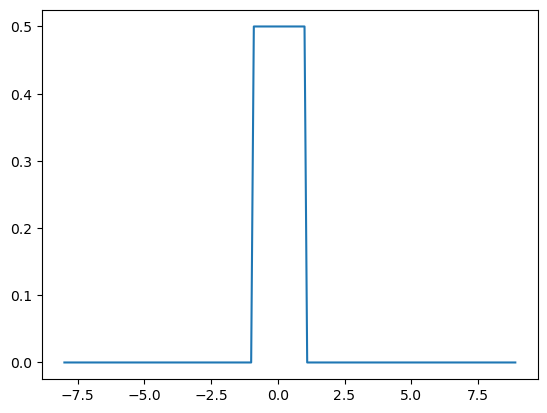

In [36]:
xtest = np.arange(-8,9,0.1)
xtest
ytest =[]
for x in xtest:
    ytest.append(pdf_uniform(x, -1, 1))
plt.plot(xtest,ytest)

In [37]:
# Test your function

print(f"Uniform PDF with a={0} and b={5} for value {1e-10}: {pdf_uniform(1e-10, 0, 5):.3f}")
print(f"Uniform PDF with a={20} and b={25} for value {5}: {pdf_uniform(5, 20, 25):.3f}")
print(f"Uniform PDF with a={2} and b={10} for value {5.4}: {pdf_uniform(5.4, 2, 10):.3f}")

Uniform PDF with a=0 and b=5 for value 1e-10: 0.200
Uniform PDF with a=20 and b=25 for value 5: 0.000
Uniform PDF with a=2 and b=10 for value 5.4: 0.125


### Gaussian PDF

You will need to implement the PDF for the Gaussian Distribution. The PDF for $X$ if $X \sim \text{Normal}(\mu,\sigma)$ is given by:

$$f(x;\mu,\sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$$ 

In [38]:
def pdf_gaussian(x, mu, sigma):
    """
    Calculate the probability density function (PDF) of a Gaussian distribution at a given value.

    Args:
        x (float or array-like): The value(s) at which to evaluate the PDF.
        mu (float): The mean of the Gaussian distribution.
        sigma (float): The standard deviation of the Gaussian distribution.

    Returns:
        float or ndarray: The PDF value(s) at the given point(s) x.
    """

    ### START CODE HERE ###
    coefficient = 1.0 / (sigma * np.sqrt(2 * np.pi))
    exponent = -0.5 * ((x - mu) / sigma) ** 2
    pdf = coefficient * np.exp(exponent)
    ### END CODE HERE ###

    return pdf

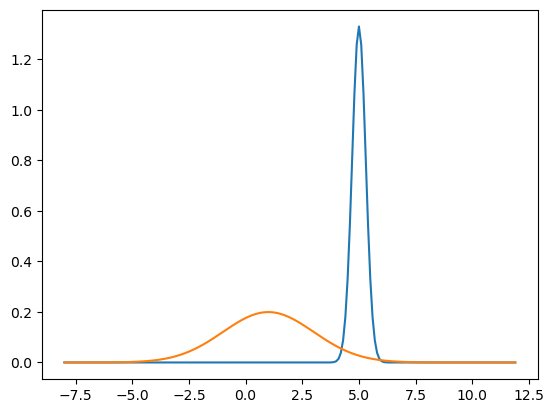

In [45]:
xtest = np.arange(-8,12,0.1)
xtest;
ytest = pdf_gaussian(xtest, 5, .3)
ytest2 = pdf_gaussian(xtest, 1, 2)

plt.plot(xtest,ytest)
plt.plot(xtest,ytest2)



In [46]:
# Test your function

print(f"Gaussian PDF with mu={15} and sigma={5} for value {10}: {pdf_gaussian(10, 15, 5):.3f}")
print(f"Gaussian PDF with mu={15} and sigma={5} for value {0}: {pdf_gaussian(0, 15, 5):.3f}")
print(f"Gaussian PDF with mu={20} and sigma={0.5} for value {20}: {pdf_gaussian(20, 20, 0.5):.3f}")
print(f"Gaussian PDF with mu={15} and sigma={5} for value {1}: {pdf_gaussian(1, 15, 5):.3f}")

Gaussian PDF with mu=15 and sigma=5 for value 10: 0.048
Gaussian PDF with mu=15 and sigma=5 for value 0: 0.001
Gaussian PDF with mu=20 and sigma=0.5 for value 20: 0.798
Gaussian PDF with mu=15 and sigma=5 for value 1: 0.002


### Binomial Probability Mass Function (PMF)

For the binomial distribution, since it is a discrete distribution, we will be using the Probability Mass Function (PMF) instead of the Probability Density Function (PDF). 
Remember that if we have a random variable X following a binomial distribution with parameters n and p, its PMF is given by:
$$f(k; n, p) = {n \choose k}  p^k  (1-p)^{n-k}$$

Here, you can calculate the combination ${n \choose k}$ using either the definition: ${n \choose k} = \frac{n!}{k!(n-k)!}$, utilizing the `math.factorial` function, or you can use the `scipy.special.comb` function to obtain the combination. You can also refer to the `binom` documentation to find any other relevant functions that may assist you.

In [47]:
def pdf_binomial(k, n, p):
    """
    Calculate the probability mass function (PMF) of a binomial distribution at a specific value.

    Args:
        k (int): The value at which to evaluate the PMF.
        n (int): The number of trials in the binomial distribution.
        p (float): The probability of success for each trial.

    Returns:
        float: The probability mass function (PMF) of the binomial distribution at the specified value.
    """

    ### START CODE HERE ###
    pdf = binom.pmf(k, n, p)
    ### END CODE HERE ###

    return pdf

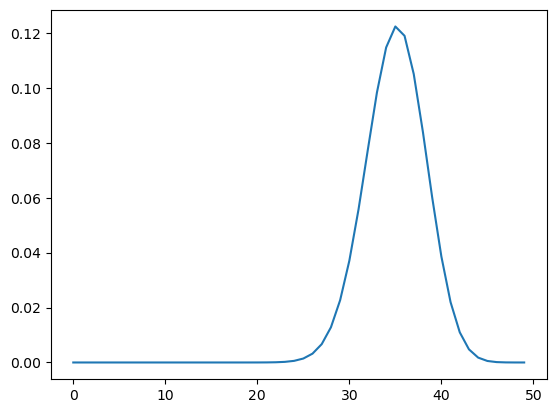

In [70]:
xtest = np.arange(0,50)
ytest = pdf_binomial(xtest, 50, 0.7)
plt.plot(xtest,ytest)

In [68]:
# Test your function

print(f"Binomial PMF with n={15} and p={0.9} for value {15}: {pdf_binomial(15, 15, 0.9):.3f}")
print(f"Binomial PMF with n={30} and p={0.5} for value {15}: {pdf_binomial(15, 30, 0.5):.3f}")
print(f"Binomial PMF with n={20} and p={0.9} for value {15}: {pdf_binomial(15, 20, 0.9):.3f}")
print(f"Binomial PMF with n={15} and p={0.5} for value {20}: {pdf_binomial(20, 15, 0.5):.3f}")

Binomial PMF with n=15 and p=0.9 for value 15: 0.206
Binomial PMF with n=30 and p=0.5 for value 15: 0.144
Binomial PMF with n=20 and p=0.9 for value 15: 0.032
Binomial PMF with n=15 and p=0.5 for value 20: 0.000
